## Chapter 4

### 선형 회귀

입력 특성의 가중치 합과 편향(또는 절편)이라는 상수를 더해 예측을 만드는 모델.

> $$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $$
> * $ \hat{y} $ : 예측값
> * $ n $ : 특성의 수
> * $ x_i $ : i번째 특성값
> * $ \theta_j $ : j번째 모델 파라미터
> 
> 또는 벡터로 다음과 같이 표현
> $$ \hat{y} = h_\theta (\mathbf{x}) = \boldsymbol{\theta} \cdot \mathbf{x} $$
> * $ \boldsymbol{\theta} $ : 편향 $ \theta_0 $, 특성 가중치 $ \theta_1 \sim \theta_n $ 를 담은 파라미터 벡터
> * $ \mathbf{x} $ : 샘플의 특성 벡터

선형 회귀 모델에서, 모델이 얼마자 잘 들어맞는지 측정하기 위해 사용되는 성능 지표는 보통 평균 제곱근 오차(RMSE)를 사용. 즉, RMSE 값이 최소화되는 $ \theta $ 를 찾아야 함.  
간단하게는 평균 제곱 오차(MSE)를 구하는 것이 더 빠름.
> $$ MSE(\mathbf{X}, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} \left(\theta^T \mathbf{x}^{(i)} - y^{(i)} \right)^2 $$
> * $ \mathbf{x}^{(i)} $ : i번째 샘플의 특성값 벡터

비용 함수(MSE)를 최소화하는 $ \theta $ 값을 최소화하기 위해 사용하는 해석적인 방법(결과를 얻을 수 있는 수학적 공식을 사용하는 방법)으로는 정규방정식(normal equation)이 있음.
> $$ \hat{\theta} = \left(\mathbf{X}^T \mathbf{X}) \right)^{-1} \mathbf{X}^T \mathbf{y} $$
> * $ \hat{\theta} $ = 비용 함수를 최소화하는 $ \theta $ 값

In [1]:
# 무작위 선형 데이터 생성
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

> * $ y=4+3x_1+\text{gaussian noise} $

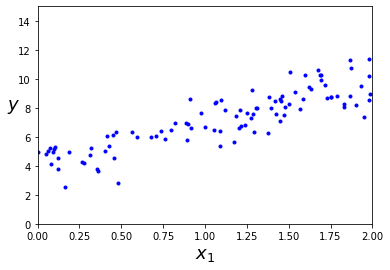

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
# 정규방정식을 사용해 theta hat 계산

X_b = np.c_[np.ones((100, 1)), X]   # x0 = 1 추가. x0는 theta0 (편향)에 대한 가상의 특성이라고 생각하면 됨(1을 곱함)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
# 위의 함수처럼 theta0 = 4, theta1 = 3을 기대했지만 잡음 때문에 완벽히 재현하지 못함.
theta_best

array([[4.08873991],
       [2.8693518 ]])

In [6]:
# theta hat을 이용한 예측
# x=0, x=2값에 대한 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.08873991],
       [9.82744351]])

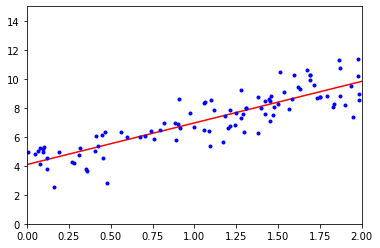

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
# scikitlearn에서 선형 회귀 사용
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [11]:
lin_reg.intercept_, lin_reg.coef_   # 각각 편향, 가중치

(array([4.08873991]), array([[2.8693518]]))

In [12]:
lin_reg.predict(X_new)

array([[4.08873991],
       [9.82744351]])

In [13]:
# 직접 구하기(sklearn의 LinearRegression에서 사용하는 방법)
# 유사역행렬(pseudoinverse) 사용. 정규방정식보다 효율적임.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.08873991],
       [2.8693518 ]])

> * 위의 <code>theta_best_svd</code>는 $ \hat{\boldsymbol{\theta}} = \mathbf{X}^+ \mathbf{y} $를 계산함
> * $ \mathbf{X}^+ $는 SVD를 통해 얻을 수 있는 pseudoinverse

In [14]:
np.linalg.pinv(X_b).dot(y)

array([[4.08873991],
       [2.8693518 ]])

* 정규방정식은 $ (n+1) \times (n+1) $ 크기가 되는 $ \mathbf{X}^T \mathbf{X} $를 구하므로 일반적으로 시간복잡도가 $ O(n^{2.4}) $, $ O(n^3) $사이가 됨. 대신, LinearRegression은 $ O(n^2) $
* n은 특성 수. 훈련 세트의 샘플 수는 증가해도 시간복잡도는 선형적으로 증가함

### 경사 하강법

* 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘.
* 비용 함수를 최적화하기 위해 반복해서 파라미터를 조정함.
* 파라미터 벡터 $ \boldsymbol{\theta} $에 대한 비용 함수의 기울기(gradient, 정확히는 비용 함수의 미분값)를 계산하고, 기울기가 감소하는 방향으로 진행.
* $ \boldsymbol{\theta} $는 임의로 설정(무작위 초기화, random initialization)할 수 있음
* 학습률 파라미터에 의해 반복 횟수 설정
  * 학습률이 너무 낮으면 시간이 오래 걸리고, 너무 높으면 적절한 해법을 잘 찾지 못함.
* 비용 함수는 여러 형태를 띌 수 있으므로, 경사 하강법의 시작 지점에 따라 최솟값에 수렴하기 어렵다는 문제가 있음.
  * MSE는 볼록 함수, 연속 함수, 기울기가 갑자기 변하지 않으므로 영향을 받지 않음.
  * 특성의 스케일이 다르면 최솟값에 도달하는데 시간이 걸리게 됨. 즉, 경사 하강법 사용 시 모든 특성이 같은 스케일을 갖도록(ex. StandardScaler() 등) 해야 함.

* 비용 함수를 계산하려면 각 파라미터 $ \theta_j $ 에 대한 비용 함수의 gradient를 계산해야 함. 즉, $ \theta $ 가 조금 변경될 때 비용 함수가 얼마나 바뀌는 지 계산해야 함. 이를 편도함수(partial derivative)라고 함.
* $ \theta_j $에 대한 비용 함수의 편도함수:
$$ \frac{\partial}{\partial \theta_j} \text{MSE}(\theta) = \frac{2}{m}\sum_{i=1}^{m}\left(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)} \right) x_j^{(i)} $$ 
* 각 파라미터에 대해 계산하지 않고 한번에 계산한다면:
$$ \nabla_\theta\text{MSE}(\boldsymbol{\theta}) =
\begin{pmatrix}
    \frac{\partial}{\partial \theta_0}\text{MSE}(\boldsymbol{\theta}) \\ 
    \frac{\partial}{\partial \theta_1}\text{MSE}(\boldsymbol{\theta}) \\ 
    \vdots \\ 
    \frac{\partial}{\partial \theta_0}\text{MSE}(\boldsymbol{\theta}) \\ 
\end{pmatrix} = \frac{2}{m}\mathbf{X}^T(\mathbf{X}\boldsymbol{\theta}-\mathbf{y}) $$ 
* 매 경사 하강법 step에서 전체 훈련 세트 X에 대해 계산하고(매 step마다 훈련 데이터 전체를 사용), 이를 배치 경사 하강법(batch gradient descent)이라고 함.
* 매우 큰 훈련 세트에서는 아주 느리지만, 특성 수에 민갛마지 않음(특성이 매우 많다면 정규방정식이나 SVD보다는 경사 하강법이 나음.).
* 위로 향하는 gradient 벡터가 구해진다면 반대 방향인 아래로 가야 함. 즉, $ \boldsymbol{\theta} $에서 $ \nabla_\theta\text{MSE}(\boldsymbol{\theta}) $를 빼야 함. 이 과정에서 학습률 $ \eta $가 필요함.
$$ \boldsymbol{\theta}^{\text{(next step)}} = \boldsymbol{\theta} - \eta\nabla_{\boldsymbol{\theta}}\text{MSE}(\boldsymbol{\theta}) $$

In [15]:
eta = 0.1   # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)    # 파라미터 theta를 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [16]:
# 위에서 정규방정식을 이용해 구한 값과 동일
theta

array([[4.08873991],
       [2.8693518 ]])

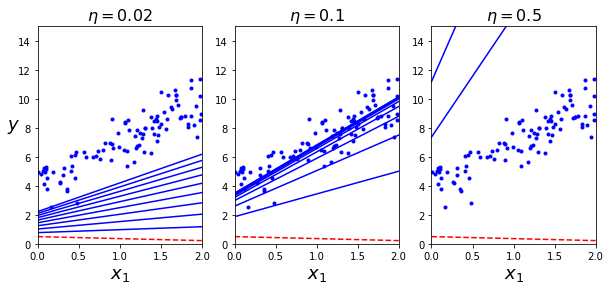

In [20]:
# 여러 학습률에 대한 경사하강법(from https://github.com/rickiepark/handson-ml2/blob/master/04_training_linear_models.ipynb)
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

> * 왼쪽은 학습률이 너무 낮아 언젠가는 최적점에 도달하겠지만 시간이 오래 걸릴 것.
> * 오른쪽은 학습률이 너무 높아 각 반복마다 최적점에서 점점 멀어짐.
> * 가운데는 학습률이 적절함.

* 적절한 학습률을 찾기 위해서는 그리드 탐색(GridSearchCV)을 사용함. 단, 시간이 오래 걸리는 것을 막기 위해 반복 횟수를 제한해야 함.
* 반복 횟수가 너무 크면 파라미터가 이미 최적점에 도달하고도 계속 반복하여 시간을 낭비하게 되고, 반복 횟수가 너무 작으면 파라미터가 최적점에 도달하기도 전에 멈추게 됨. 이를 해결하기 위해, 반복 횟수를 매우 크게 지정하고 gradient 벡터가 아주 작아지면, 즉 벡터의 norm이 허용오차 $ \epsilon $보다 작아지면 알고리즘을 중지함.